# Total flow plot

Make a plot of total flow before and after the pandemic.

In [5]:
using Plots
using DataFrames
using StatsBase
using Printf


In [1]:
using KFactors

┌ Info: Precompiling KFactors [ed362b46-60d5-416f-85cf-bff05ff5e122]
└ @ Base loading.jl:1423


In [2]:
full_data = read_data("../data/peaks_merged.parquet")
data = KFactors.create_test_data(full_data, KFactors.Periods.SPRING_2022)

┌ Info: Removing sensors days with peak-hour occ above 99th percentile (0.23%)
└ @ KFactors /Users/mwbc/git/peak-spreading/src/computation.jl:67


,station,peak_hour_occ,peak_hour_occ_avg,peak_hour_flow,peak_hour_demand,peak_hour_demand_avg
,Int64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,312010,0.134762,0.364158,0.0351875,0.0765258,9368.93
2,312098,0.0936754,0.188375,0.0565509,0.0631433,9490.0
3,312103,0.113312,0.272917,0.0636459,0.0824705,9321.14
4,312132,0.0778201,0.0816333,0.0859421,0.088392,2273.0
5,312134,0.0742908,0.0820833,0.0736952,0.0736952,2550.0
6,312139,0.105445,0.348317,0.0552882,0.0919537,15794.6
7,312326,0.0875532,0.0480083,0.0966536,0.0966536,2715.0
8,312346,0.079661,0.10245,0.0741977,0.0754064,4991.0
9,312386,0.167777,0.2618,0.061312,0.0849627,5647.73


In [10]:
# https://identity.unc.edu/brand/color-palette/
const UNC_BLUE = RGB(75/255, 156/255, 211/255)
const UNC_NAVY = RGB(19/255, 41/255, 75/255)
const UNC_DAVIE_GREEN = RGB(196/255, 214/255, 0/255)
const UNC_PINK = RGB(239/255, 68/255, 111/255)

In [6]:
# create the sensor means pre and post pandemic
sensor_mean_flow = combine(groupby(data, [:station, :period]), :total_flow => mean)
sensor_mean_flow = unstack(sensor_mean_flow, :station, :period, :total_flow_mean)
nothing

In [8]:
sensor_mean_flow.change_prepost = sensor_mean_flow.postlockdown .- sensor_mean_flow.prepandemic
sensor_mean_flow.rel_change_prepost = sensor_mean_flow.change_prepost ./ sensor_mean_flow.prepandemic .* 100
nothing

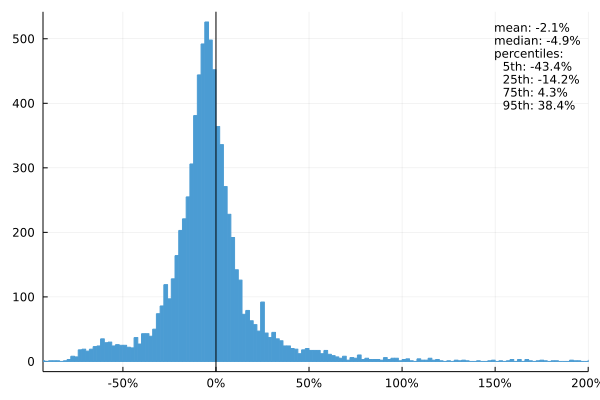

In [11]:
complete = collect(skipmissing(sensor_mean_flow.rel_change_prepost))
histogram(complete,
    xlim = (min(complete...), 200), legend=false, fill=UNC_BLUE, line=UNC_BLUE)#, xlab="Change in mean vehicles per day, pre- to post-pandemic, by sensor")
vline!([0], color=:black)
plot!(xformatter=(x -> @sprintf "%d%%" x))
annotate!(
    (150, 450, text(@sprintf("""
mean: %.1f%%
median: %.1f%%
percentiles:
  5th: %.1f%%
  25th: %.1f%%
  75th: %.1f%%
  95th: %.1f%%
            """, mean(complete), percentile(complete, [50, 5, 25, 75, 95])...), halign=:left, pointsize=8))
    )
savefig("../fig/flow_change.pdf")
plot!()